# Formula One Project: Data Preparation and EDA

DUE: November 22nd, 2024 (Fri)  
Name(s): Sean O'Connor, Connor Coles    
Class: CSCI 349 - Intro to Data Mining  
Semester: Fall 2024  
Instructor: Brian King  

## Assignment Description
Create your first notebook file, DataPrep_EDA.ipynb. Use both markdown and code cells to convey the following:
- What problem are you working on? Summarize in a single cell.
- What data are you using to understand the problem? Describe the data in a very general sense. Where did it come from? You should understand what every observation in the data represents, and what each variable represents.
- Remember that the key to achieving good machine learning outcomes is understanding how each real-world entity in your data will be represented as a fixed length vector of attributes in your dataset! Preprocessing your data will be a big part of this challenge. If you do not expect to spend quality time cleaning and prepping your data, you will not get good results. Once you have established how each data object is represented in a form ready for a data mining algorithm, and the data are clean, you will have a substantial part of your battle toward modeling solved.
- Strive to generate good summary statistics, show what the data looks like, and include good EDA and visualizations with boxplots, barcharts, density plots for key variables, or whatever other plots you want that are specific to your data and problem to help the reader understand basic distributions of important variables. Visualizations can help you convey general info about your data and are extremely helpful.
- In your final cells, discuss the modeling methods you expect to use. Start by clearly explaining if this is a classification, regression, clustering, or association rule mining problem? Justify. You have much of the framework to apply most algorithms, even those beyond what we covered in class. Feel free to explore different methods if you have good justification for doing so. If there are any papers of significance that have been published with these data, then discuss the ones most interesting/relevant to the team.
- Finally, what is your overarching aim with this project? What are you hoping to learn? Or, what hypothesis are you using the data to confirm or disprove? What challenges do you foresee on this project? Discuss your concerns. How will you get your work done? Give a reasonable list of milestones to reach to arrive at the final deadline for the project.

## Problem Summary
We are conducting a data mining project focused on analyzing driver performance in Formula One. Our goal is to correlate driver performance with track and weather conditions, and to predict future race results using these correlations. We will apply various data mining techniques learned throughout the course to extract meaningful insights from the dataset.

In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from fastf1.ergast.structure import FastestLap

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '44', '77', '5', '3', '27', '55', '23', '18', '7', '99', '20', '26', '4', '10', '8', '11', '63', '88', '33']


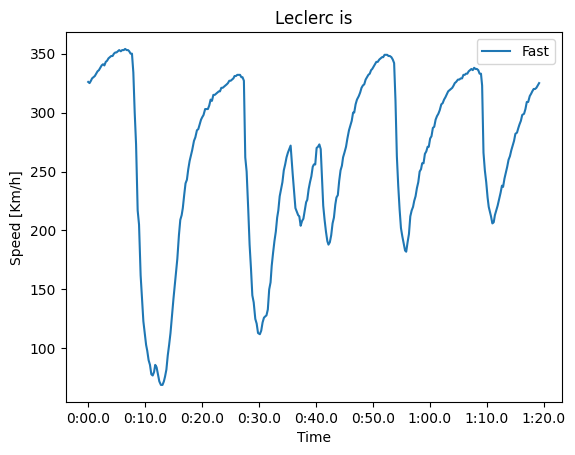

In [10]:
# FastF1 Example
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme=None)

session = fastf1.get_session(2019, 'Monza', 'Q')

session.load()
fast_leclerc = session.laps.pick_drivers('LEC').pick_fastest()
lec_car_data = fast_leclerc.get_car_data()
t = lec_car_data['Time']
vCar = lec_car_data['Speed']

# The rest is just plotting
fig, ax = plt.subplots()
ax.plot(t, vCar, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Leclerc is')
ax.legend()
plt.show()

In [30]:
# Define the cache directory
cache_dir = '/Users/connorcoles/PycharmProjects/F1-Prediction/csci349_final_project/project/cache'
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

fastf1.Cache.enable_cache(cache_dir)

# Years and sessions of interest
years = [2020, 2021, 2022, 2023, 2024]
sessions = ['Q', 'Race']  # Qualifying and Race sessions
event_name = 'Bahrain'    # Example event name

# Data holders
weather_data_list = []
lap_data_list = []

# Loop through years and sessions
for year in years:
    for session_name in sessions:
        try:
            # Load the session
            session = fastf1.get_session(year, event_name, session_name)
            session.load()
            
            # Process weather data
            weather_data = session.weather_data
            weather_df = pd.DataFrame(weather_data)
            weather_df['Year'] = year
            weather_df['Session'] = session_name
            weather_data_list.append(weather_df)

            # Process lap data
            lap_data = session.laps
            lap_df = pd.DataFrame(lap_data)
            lap_df['Year'] = year
            lap_df['Session'] = session_name
            lap_data_list.append(lap_df)
        
        except Exception as e:
            print(f"Error with {event_name} {session_name} ({year}): {e}")

# Combine weather and lap data into separate DataFrames
if weather_data_list:
    weather_data_combined = pd.concat(weather_data_list, ignore_index=True)
    print("Weather Data:")
    print(weather_data_combined.head())

if lap_data_list:
    lap_data_combined = pd.concat(lap_data_list, ignore_index=True)
    print("Lap Data:")
    print(lap_data_combined.head())

events      WARNING 	Correcting user input 'Bahrain' to 'Bahrain Grand Prix'
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '23', '11', '3', '31', '10', '4', '26', '5', '16', '18', '63', '55', '99', '7', '20', '8', '6']
events      WARNING 	Correcting us

Weather Data:
                    Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0 0 days 00:00:33.157000     26.9      52.6    1015.9     False       28.7   
1 0 days 00:01:33.168000     26.9      52.7    1016.0     False       28.6   
2 0 days 00:02:33.172000     26.8      52.8    1015.9     False       28.5   
3 0 days 00:03:33.168000     26.8      53.0    1015.9     False       28.5   
4 0 days 00:04:33.155000     26.7      53.2    1016.0     False       28.5   

   WindDirection  WindSpeed  Year Session  
0            305        0.6  2020       Q  
1             40        0.8  2020       Q  
2            341        0.8  2020       Q  
3            295        0.4  2020       Q  
4            347        0.5  2020       Q  
Lap Data:
                    Time Driver DriverNumber                LapTime  \
0 0 days 00:23:28.426000    HAM           44                    NaT   
1 0 days 00:24:56.769000    HAM           44 0 days 00:01:28.343000   
2 0 days 00:26:46.183000    HA

In [47]:
# Display data
weather_data_combined.head(5)

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Year,Session
0,0 days 00:00:33.157000,26.9,52.6,1015.9,False,28.7,305,0.6,2020,Q
1,0 days 00:01:33.168000,26.9,52.7,1016.0,False,28.6,40,0.8,2020,Q
2,0 days 00:02:33.172000,26.8,52.8,1015.9,False,28.5,341,0.8,2020,Q
3,0 days 00:03:33.168000,26.8,53.0,1015.9,False,28.5,295,0.4,2020,Q
4,0 days 00:04:33.155000,26.7,53.2,1016.0,False,28.5,347,0.5,2020,Q


In [67]:
lap_data_combined.head(5)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Year,Session
0,0 days 00:23:28.426000,HAM,44,NaT,1.0,1.0,0 days 00:21:22.161000,NaT,NaT,0 days 00:00:57.104000,...,0 days 00:21:22.161000,2020-11-28 14:06:22.193,1,NaN,False,,False,False,2020,Q
1,0 days 00:24:56.769000,HAM,44,0 days 00:01:28.343000,2.0,1.0,NaT,NaT,0 days 00:00:28.083000,0 days 00:00:38.020000,...,0 days 00:23:28.426000,2020-11-28 14:08:28.458,1,NaN,False,,False,True,2020,Q
2,0 days 00:26:46.183000,HAM,44,0 days 00:01:49.414000,3.0,1.0,NaT,0 days 00:26:44.401000,0 days 00:00:34.081000,0 days 00:00:45.383000,...,0 days 00:24:56.769000,2020-11-28 14:09:56.801,1,NaN,False,,False,False,2020,Q
3,0 days 00:32:41.745000,HAM,44,NaT,4.0,2.0,0 days 00:30:17.211000,NaT,NaT,0 days 00:01:06.133000,...,0 days 00:26:46.183000,2020-11-28 14:11:46.215,1,NaN,False,,False,False,2020,Q
4,0 days 00:34:21.973000,HAM,44,0 days 00:01:40.228000,5.0,2.0,NaT,0 days 00:34:20.228000,0 days 00:00:28.239000,0 days 00:00:45.630000,...,0 days 00:32:41.745000,2020-11-28 14:17:41.777,1,NaN,False,,False,False,2020,Q


In [54]:
#What does our data look like?
weather_data_combined.info()
lap_data_combined.info()

#How many unique values do we have?
print(weather_data_combined.nunique())
print(lap_data_combined.nunique())

#Are there any missing values?
print(weather_data_combined.isnull().sum())
print(lap_data_combined.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Time           1244 non-null   timedelta64[ns]
 1   AirTemp        1244 non-null   float64        
 2   Humidity       1244 non-null   float64        
 3   Pressure       1244 non-null   float64        
 4   Rainfall       1244 non-null   bool           
 5   TrackTemp      1244 non-null   float64        
 6   WindDirection  1244 non-null   int64          
 7   WindSpeed      1244 non-null   float64        
 8   Year           1244 non-null   int64          
 9   Session        1244 non-null   object         
dtypes: bool(1), float64(5), int64(2), object(1), timedelta64[ns](1)
memory usage: 88.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6628 entries, 0 to 6627
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype          
---  ------  

In [43]:
#Describe the data
weather_data_combined.describe()

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime,LapStartDate,Position,Year
count,6628,6038,6628.000000,6628.000000,689,694,6056,6599,6566,6048,...,6566,5394.000000,6601.000000,5926.000000,5944.000000,6628.000000,6628,6622,5349.000000,6628.000000
mean,0 days 01:42:02.192371303,0 days 00:01:41.108333885,24.366777,2.545866,0 days 01:07:15.479603773,0 days 01:08:51.778342939,0 days 00:00:32.801727873,0 days 00:00:44.382851038,0 days 00:00:25.863896740,0 days 01:45:48.699285218,...,0 days 01:42:19.752332013,221.138673,240.172095,277.101249,276.023890,8.922299,0 days 01:40:00.888514634,2022-05-19 11:52:27.328777728,9.980183,2022.045112
min,0 days 00:15:27.765000,0 days 00:01:27.264000,1.000000,1.000000,0 days 00:13:35.553000,0 days 00:18:28.415000,0 days 00:00:27.669000,0 days 00:00:37.715000,0 days 00:00:21.853000,0 days 00:15:57.525000,...,0 days 00:15:28.005000,54.000000,44.000000,42.000000,31.000000,1.000000,0 days 00:13:35.553000,2020-11-28 14:00:03.421000,1.000000,2020.000000
25%,0 days 01:09:17.505500,0 days 00:01:36.217000,9.000000,2.000000,0 days 00:29:59.107000,0 days 00:35:37.662250,0 days 00:00:30.732750,0 days 00:00:41.676500,0 days 00:00:23.736000,0 days 01:14:22.595250,...,0 days 01:09:21.996000,225.000000,241.000000,277.000000,280.000000,3.000000,0 days 01:06:55.995500,2021-03-28 15:21:05.414749952,5.000000,2021.000000
50%,0 days 01:39:58.302000,0 days 00:01:37.859500,22.000000,2.000000,0 days 00:59:30.380000,0 days 00:58:21.241500,0 days 00:00:31.148000,0 days 00:00:42.582000,0 days 00:00:24.126000,0 days 01:44:32.815000,...,0 days 01:40:39.423500,231.000000,250.000000,281.000000,295.000000,8.000000,0 days 01:38:20.161000,2022-03-20 15:46:26.377999872,10.000000,2022.000000
75%,0 days 02:13:43.248500,0 days 00:01:40.345500,39.000000,3.000000,0 days 01:28:09.343000,0 days 01:25:50.796000,0 days 00:00:31.792000,0 days 00:00:43.779500,0 days 00:00:24.901750,0 days 02:15:42.518250,...,0 days 02:14:05.441000,235.000000,257.000000,284.000000,303.000000,13.000000,0 days 02:12:04.575250,2023-03-05 16:12:27.612000,15.000000,2023.000000
max,0 days 03:33:47.428000,0 days 00:03:05.092000,57.000000,7.000000,0 days 03:28:04.389000,0 days 03:27:38.638000,0 days 00:01:39.160000,0 days 00:01:27.340000,0 days 00:01:10.478000,0 days 03:32:33.946000,...,0 days 03:33:47.428000,248.000000,274.000000,302.000000,333.000000,37.000000,0 days 03:32:00.121000,2024-03-02 16:35:23.280000,20.000000,2024.000000
std,0 days 00:44:32.891277624,0 days 00:00:10.588901657,16.860094,1.155031,0 days 00:41:40.584927846,0 days 00:39:18.227030052,0 days 00:00:05.843587609,0 days 00:00:06.025195453,0 days 00:00:04.862155415,0 days 00:42:50.934311129,...,0 days 00:44:32.425629872,28.861242,32.657155,22.133798,52.878471,6.475231,0 days 00:44:57.137961013,NaN,5.511766,1.411731


In [49]:
lap_data_combined.describe()

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime,LapStartDate,Position,Year
count,6628,6038,6628.000000,6628.000000,689,694,6056,6599,6566,6048,...,6566,5394.000000,6601.000000,5926.000000,5944.000000,6628.000000,6628,6622,5349.000000,6628.000000
mean,0 days 01:42:02.192371303,0 days 00:01:41.108333885,24.366777,2.545866,0 days 01:07:15.479603773,0 days 01:08:51.778342939,0 days 00:00:32.801727873,0 days 00:00:44.382851038,0 days 00:00:25.863896740,0 days 01:45:48.699285218,...,0 days 01:42:19.752332013,221.138673,240.172095,277.101249,276.023890,8.922299,0 days 01:40:00.888514634,2022-05-19 11:52:27.328777728,9.980183,2022.045112
min,0 days 00:15:27.765000,0 days 00:01:27.264000,1.000000,1.000000,0 days 00:13:35.553000,0 days 00:18:28.415000,0 days 00:00:27.669000,0 days 00:00:37.715000,0 days 00:00:21.853000,0 days 00:15:57.525000,...,0 days 00:15:28.005000,54.000000,44.000000,42.000000,31.000000,1.000000,0 days 00:13:35.553000,2020-11-28 14:00:03.421000,1.000000,2020.000000
25%,0 days 01:09:17.505500,0 days 00:01:36.217000,9.000000,2.000000,0 days 00:29:59.107000,0 days 00:35:37.662250,0 days 00:00:30.732750,0 days 00:00:41.676500,0 days 00:00:23.736000,0 days 01:14:22.595250,...,0 days 01:09:21.996000,225.000000,241.000000,277.000000,280.000000,3.000000,0 days 01:06:55.995500,2021-03-28 15:21:05.414749952,5.000000,2021.000000
50%,0 days 01:39:58.302000,0 days 00:01:37.859500,22.000000,2.000000,0 days 00:59:30.380000,0 days 00:58:21.241500,0 days 00:00:31.148000,0 days 00:00:42.582000,0 days 00:00:24.126000,0 days 01:44:32.815000,...,0 days 01:40:39.423500,231.000000,250.000000,281.000000,295.000000,8.000000,0 days 01:38:20.161000,2022-03-20 15:46:26.377999872,10.000000,2022.000000
75%,0 days 02:13:43.248500,0 days 00:01:40.345500,39.000000,3.000000,0 days 01:28:09.343000,0 days 01:25:50.796000,0 days 00:00:31.792000,0 days 00:00:43.779500,0 days 00:00:24.901750,0 days 02:15:42.518250,...,0 days 02:14:05.441000,235.000000,257.000000,284.000000,303.000000,13.000000,0 days 02:12:04.575250,2023-03-05 16:12:27.612000,15.000000,2023.000000
max,0 days 03:33:47.428000,0 days 00:03:05.092000,57.000000,7.000000,0 days 03:28:04.389000,0 days 03:27:38.638000,0 days 00:01:39.160000,0 days 00:01:27.340000,0 days 00:01:10.478000,0 days 03:32:33.946000,...,0 days 03:33:47.428000,248.000000,274.000000,302.000000,333.000000,37.000000,0 days 03:32:00.121000,2024-03-02 16:35:23.280000,20.000000,2024.000000
std,0 days 00:44:32.891277624,0 days 00:00:10.588901657,16.860094,1.155031,0 days 00:41:40.584927846,0 days 00:39:18.227030052,0 days 00:00:05.843587609,0 days 00:00:06.025195453,0 days 00:00:04.862155415,0 days 00:42:50.934311129,...,0 days 00:44:32.425629872,28.861242,32.657155,22.133798,52.878471,6.475231,0 days 00:44:57.137961013,NaN,5.511766,1.411731


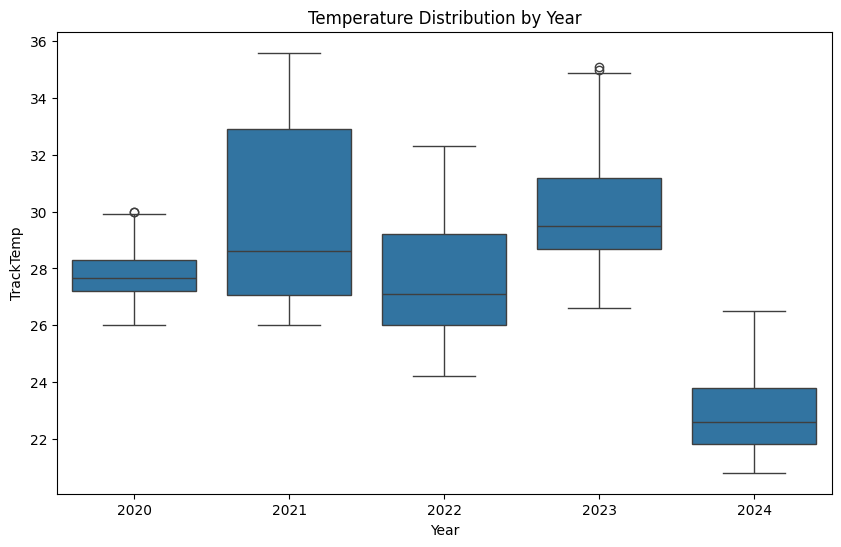

In [52]:
#Visualizations
# Boxplot of Weather Data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='TrackTemp', data=weather_data_combined)
plt.title('Temperature Distribution by Year')
plt.show()


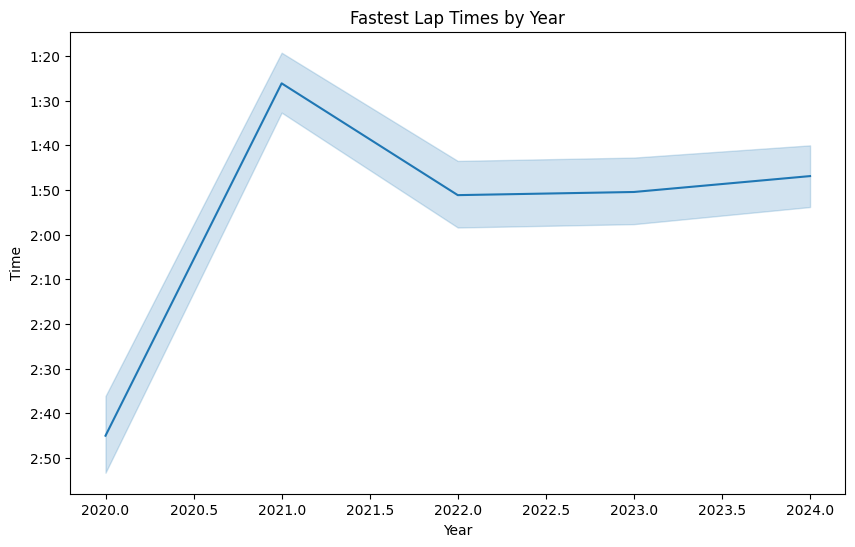

In [68]:
# Graph of Fastest Lap Times by Year
# Who had the fastest lap time in each year?
fastest_lap = lap_data_combined[lap_data_combined['Position'] == 1]
# Remove 0 times
fastest_lap = fastest_lap[fastest_lap['Time'] != pd.Timedelta(0)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Time', data=fastest_lap)
plt.title('Fastest Lap Times by Year')
plt.show()

